# Case study on Supervised learning
   ## Do the following in the iris dataset.
    1. Read the dataset to the python environment.
    2. Do necessary pre-processing steps.
    3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


# 1. Read the dataset to the python environment.

In [1192]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import mean_squared_error,r2_score,f1_score,confusion_matrix,precision_score,recall_score,accuracy_score

In [1193]:
df=pd.read_excel('iris.xls')

In [1194]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do necessary pre-processing steps.

# Preprocessing

In [1195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [1196]:
df.shape

(150, 5)

In [1197]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Label Encoding

In [1198]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

In [1199]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [1200]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,NaN,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [1201]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,NaN,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [1202]:
df['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# Insight
    The classification column which is the target variable is label encoded

# Checking for missing values

In [1203]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Plotting frequency

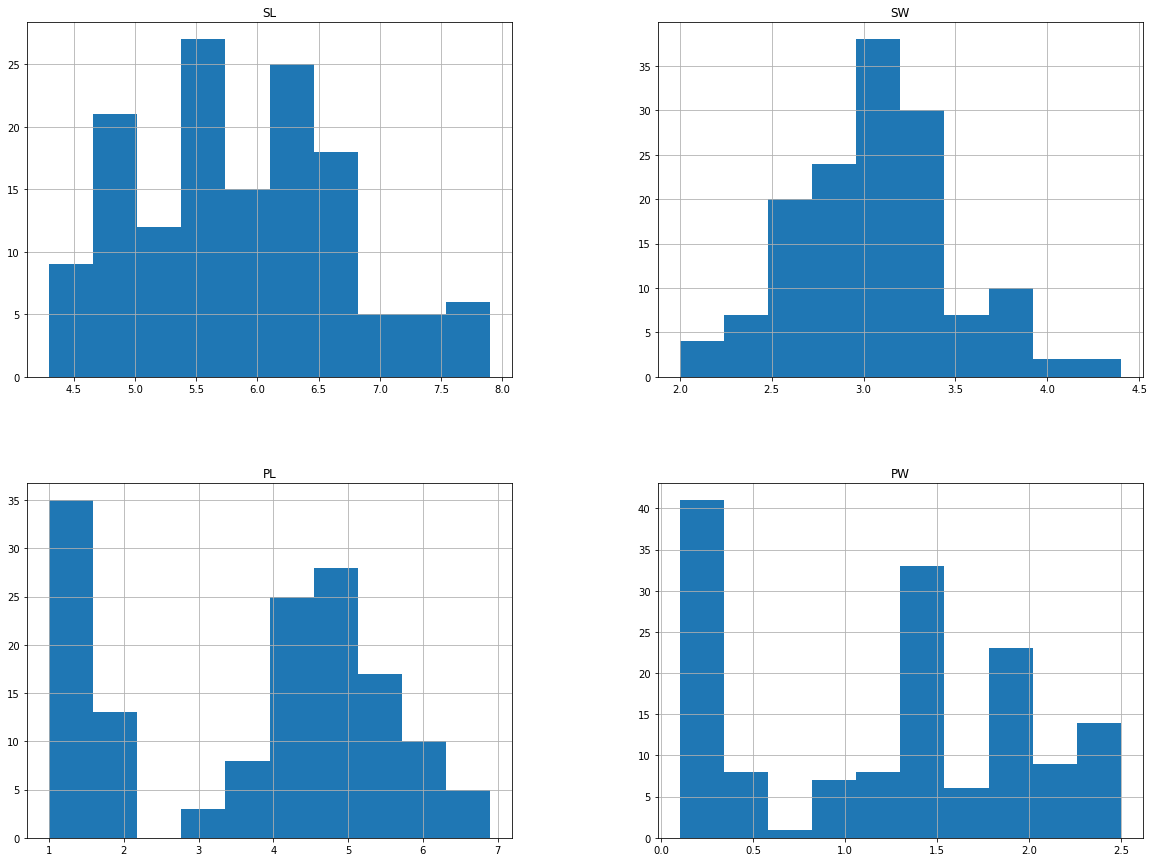

In [1204]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

# Filling missing values using KNN Imputer

In [1205]:
#KNN_Imputer

In [1206]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [1207]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [1208]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Insight
    As it is found that KNN imputer helps replace the missing values in each column comparing it with similar columns, I find this more efficient than using the mean, median or mode to fill the missing values.

# Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3d4dafb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3d4dbc220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3d4daf7c0>,
 'medians': [<matplotlib.lines.Line2D at 0x1e3d4dbc8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e3d4dbcc40>,
 'means': []}

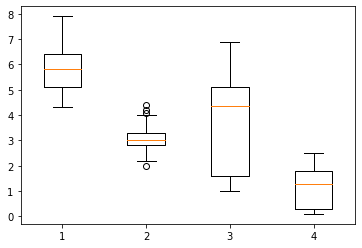

In [1209]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3d330a040>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3d330a9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3d32d5a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e3cf7c5a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e3d130ac70>],
 'means': []}

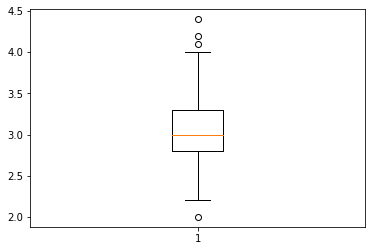

In [1210]:
plt.boxplot(df['SW'])

In [1211]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.8
3.0
3.3
2.05
4.05


In [1212]:
outlier=[]
for x in df['SW']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [1213]:
ind=df['SW']<low_lim
df.loc[ind].index

Int64Index([60], dtype='int64')

In [1214]:
ind1=df['SW']>up_lim
df.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [1215]:
df.drop([15, 32, 33, 60],inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e3d4d7b160>,
 'caps': [<matplotlib.lines.Line2D at 0x1e3d4d7baf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e3d4d61250>,
 'medians': [<matplotlib.lines.Line2D at 0x1e3d2f9cc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e3d2f9cf40>,
 'means': []}

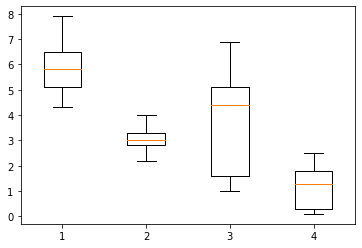

In [1216]:
plt.boxplot(df[['SL', 'SW', 'PL', 'PW']])

# Insight
    All outliers are removed.

# Feature Engineering

In [1217]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [1218]:
df['mean']=df[['SL', 'SW', 'PL', 'PW']].mean(axis=1)
df['sum']=df[['SL', 'SW', 'PL', 'PW']].sum(axis=1)
df['skew']=df[['SL', 'SW', 'PL', 'PW']].skew(axis=1)
df['kurt']=df[['SL', 'SW', 'PL', 'PW']].kurt(axis=1)

In [1219]:
df.head()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
0,5.1,3.5,1.4,0.2,0.0,2.550,10.2,0.189328,-2.368842
1,4.9,3.0,1.4,0.2,0.0,2.375,9.5,0.404389,-1.091924
2,4.7,3.2,1.3,0.2,0.0,2.350,9.4,0.208782,-2.276657
3,4.6,3.1,1.5,0.2,0.0,2.350,9.4,0.120130,-1.575170
4,5.0,3.6,1.4,0.2,0.0,2.550,10.2,0.090753,-2.787004


In [1220]:
df.tail()

,SL,SW,PL,PW,Classification,mean,sum,skew,kurt
145,6.7,3.0,5.2,2.3,2.0,4.300,17.2,0.351514,-2.983606
146,6.3,2.5,5.0,1.9,2.0,3.925,15.7,0.256478,-3.790103
147,6.5,3.0,5.3,2.0,2.0,4.200,16.8,0.085072,-3.407316
148,6.2,3.4,5.4,2.3,2.0,4.325,17.3,-0.146244,-3.387994
149,5.9,3.0,5.1,1.8,2.0,3.950,15.8,-0.185387,-3.345923


In [1221]:
df.shape

(146, 9)

# Insight
    Four New features are added :
    1 mean
    2 sum	
    3 skew	
    4 kurt

# Splitting the data

In [1222]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification', 'mean', 'sum', 'skew',
       'kurt'],
      dtype='object')

In [1223]:
x=df.drop(['Classification'],axis=1)
y=df['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [1224]:
x_train.shape

(116, 8)

In [1225]:
x_test.shape

(30, 8)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

# Scaling using MinMax Scaler

In [1226]:
from sklearn import preprocessing
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x_test= min_max.fit_transform(x_test)
x_train= min_max.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

# Insight
 We use MinMax Scaler as it will preserve the shape of the dataset (no distortion) and since the distrubution is not normally distrubuted for PL and PW as seen from the Frequency plot.

# 1. Building the model using RandomForestClassifier

In [1227]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1228]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='weighted'))
print("Recall is:",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pred,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1229]:
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

In [1230]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW      24.317643
PL      21.101796
sum     16.500715
kurt    15.776338
mean    14.622632
SL       4.442936
skew     1.644374
SW       1.593566
dtype: float64

# 2. Building the model using Gradient Boosting

# 2.1 Gradient Boosting

In [1231]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_predict=gb.predict(x_test)

In [1232]:
print("Accuracy is:",accuracy_score(y_test,y_predict))
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1233]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 2.2 Extreme Gradient Boosting

In [1234]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_predd=xgb.predict(x_test)

[01:10:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NJ\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [1235]:
print("Accuracy is:",accuracy_score(y_test,y_predd))
print("Precision is:",precision_score(y_test,y_predd,average='weighted'))
print("Recall is:",recall_score(y_test,y_predd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predd,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1236]:
confusion_matrix(y_test,y_predd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 3. Building the model using Logistic regression

In [1237]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
y_preddd=log_r.predict(x_test)

In [1238]:
print("Accuracy is:",accuracy_score(y_test,y_preddd))
print("Precision is:",precision_score(y_test,y_preddd,average='weighted'))
print("Recall is:",recall_score(y_test,y_preddd,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_preddd,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1239]:
confusion_matrix(y_test,y_preddd)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 4. Building the model using KNN Model

In [1240]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predic=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predic)
    acc_values.append(acc)


In [1241]:
acc_values

[1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

Text(0, 0.5, 'accuracy')

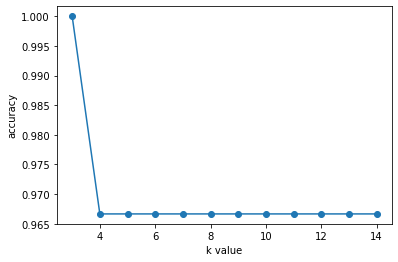

In [1242]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [1243]:
classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski')
classifier.fit(x_train,y_train)
y_predic=classifier.predict(x_test)

In [1244]:
print("Accuracy is:",accuracy_score(y_test,y_predic))
print("Precision is:",precision_score(y_test,y_predic,average='weighted'))
print("Recall is:",recall_score(y_test,y_predic,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predic,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1245]:
confusion_matrix(y_test,y_predic)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

#  5. Building the model using Decision Tree Model¶

In [1246]:
from sklearn.tree import DecisionTreeClassifier

In [1247]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pr=dt.predict(x_test)

In [1248]:
print("Accuracy is:",accuracy_score(y_test,y_pr))
print("Precision is:",precision_score(y_test,y_pr,average='weighted'))
print("Recall is:",recall_score(y_test,y_pr,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pr,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [1249]:
confusion_matrix(y_test,y_pr)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 10]], dtype=int64)

# 6. Building the model using SVM Model¶

In [1250]:
from sklearn.svm import SVC

# 6.1 Linear SVM

In [1251]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pre=svm_linear.predict(x_test)

In [1252]:
print("Accuracy is:",accuracy_score(y_test,y_pre))
print("Precision is:",precision_score(y_test,y_pre,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1253]:
confusion_matrix(y_test,y_pre)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# 6.2 Polynomial SVM

In [1254]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pre1=svm_poly.predict(x_test)

In [1255]:
print("Accuracy is:",accuracy_score(y_test,y_pre1))
print("Precision is:",precision_score(y_test,y_pre1,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre1,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre1,average='weighted'))

Accuracy is: 0.9333333333333333
Precision is: 0.9444444444444445
Recall is: 0.9333333333333333
F1 Score is: 0.9316017316017315


In [1256]:
confusion_matrix(y_test,y_pre1)

array([[12,  0,  0],
       [ 0,  6,  2],
       [ 0,  0, 10]], dtype=int64)

# 6.3 Radial SVM

In [1257]:
svm_rad=SVC(kernel='rbf')
svm_rad.fit(x_train,y_train)
y_pre2=svm_rad.predict(x_test)

In [1258]:
print("Accuracy is:",accuracy_score(y_test,y_pre2))
print("Precision is:",precision_score(y_test,y_pre2,average='weighted'))
print("Recall is:",recall_score(y_test,y_pre2,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_pre2,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9703703703703703
Recall is: 0.9666666666666667
F1 Score is: 0.9667698658410733


In [1259]:
confusion_matrix(y_test,y_pre2)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

# Insight
    The decision tree model has the highest vaules.
    Accuracy is: 1.0
    Precision is: 1.0
    Recall is: 1.0
    F1 Score is: 1.0
    Hence it is the best model